**Instituto Tecnológico de Costa Rica**

**Escuela de Ingeniería en Computación**

**Maestría Académica en Ciencias de la Computación**

**Curso: Electiva Deep Learning**

**Segundo Semestre 2024**

**Profesor: Dr. Luis-Alexander Calvo-Valverde**

---

**Trabajo Práctico:** 1

**Datos de la entrega:** Jueves 26 de setiembre 2024, a más tardar a las 6:00 pm

**Medio de entrega**: Por medio del TEC-Digital.

**Entregables**: Un archivo jupyter ( .IPYNB ) y todos los archivos adiconales que se requieran para correr su Cuaderno (En un archivo comprimido). En caso de requerir mucho espacio, solicitarle al profesor una carpeta en One-Drive para subir la solución.

---

**Estudiantes:**
- Josef Ruzicka 2024800833
- William Jiménez 200938187



## Leer esto primero.

1. Usted puede cambiar el dataset que se le proporciona por otro  que sea de su interés; pero de hacerlo, se le recomienda valorarlo con el profesor para que su dataset propuesto no le agregue una complicación importante al Trabajo Práctico.

1. En caso de que el diseño experimental supere en mucho la capacidad de procesamiento computacional que puede conseguir, se le recomienda hablar con el profesor para valorar opciones como disminuir el tamaño del dataset.

## Indicaciones generales que deben seguir:

1. Se le proporciona el conjunto de datos y una hoja electrónica con detalles del dataset.

1. Realizarán clasificación y el atributo a predecir es: **melanocytic**.

1. Ustedes deben ir tomando las decisiones en el proceso y documentarlas en celdas de texto y además su código debe venir ampliamente comentado.

1. Se dividirá el dataset en tres conjuntos de datos: train (60%), validation (20%) y test (20%).

1. Ustedes proponen el diseño experimental (quiero ver qué han entendido de este concepto fundamental).

# Parte 1.  Experimentación con capas totalmente conectadas y un selector de hiperparámetros

1. Debe proponer una red neuronal artificial que solo incluya capas totalmente conectadas. Para la selección de hiperparámetros debe utilizar una herramienta especializada para esto (como keras tunner).






In [12]:
# libraries
from zipfile import ZipFile # https://www.geeksforgeeks.org/unzipping-files-in-python/
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# extract zip contents
images_path = "images"
zip_file = "ISIC-images.zip"
with ZipFile(zip_file, 'r') as zip_ref:
	#zip_ref.extractall("/content/images")
	zip_ref.extractall(path=images_path)


In [24]:
# load metadata csv file
metadata = pd.read_csv("images\metadata.csv")
# convert True/False labels to 1/0 as strings, which is expected by the ImageDataGenerator
metadata['melanocytic'] = metadata['melanocytic'].astype(int).astype(str)
# add jpg to match image name
metadata['isic_id'] = metadata['isic_id']+".jpg"
print(metadata.head())
print(len(metadata))

            isic_id                                        attribution  \
0  ISIC_0024306.jpg  ViDIR Group, Department of Dermatology, Medica...   
1  ISIC_0024307.jpg  ViDIR Group, Department of Dermatology, Medica...   
2  ISIC_0024308.jpg  ViDIR Group, Department of Dermatology, Medica...   
3  ISIC_0024309.jpg  ViDIR Group, Department of Dermatology, Medica...   
4  ISIC_0024310.jpg  ViDIR Group, Department of Dermatology, Medica...   

  copyright_license  age_approx anatom_site_general benign_malignant  \
0          CC-BY-NC        45.0                 NaN           benign   
1          CC-BY-NC        50.0     lower extremity           benign   
2          CC-BY-NC        55.0                 NaN           benign   
3          CC-BY-NC        40.0                 NaN           benign   
4          CC-BY-NC        60.0      anterior torso        malignant   

   concomitant_biopsy diagnosis            diagnosis_confirm_type  \
0               False     nevus  serial imaging showi

In [25]:
# Train-test split, then test-validation split
# stratify balances the class distribution
# random_state is used for reproducibility, 42 is a typical value as an inside joke regarding the Hitchhiker’s Guide to the Galaxy by Douglas Adams
train, test = train_test_split(metadata, test_size=0.4, stratify=metadata['melanocytic'], random_state=42)
test, val = train_test_split(test, test_size=0.5, stratify=test['melanocytic'], random_state=42)

# data-label split
X_train = train['isic_id']
X_test = test['isic_id']
X_val = val['isic_id']

y_test = test['melanocytic']
y_train = train['melanocytic']
y_val = val['melanocytic']

print(f"train: {len(X_train)} {len(y_train)}")
print(f"test: {len(X_test)} {len(y_test)}")
print(f"val: {len(X_val)} {len(y_val)}")
print(f"example: {X_train[0]} {y_train[0]}")

train: 7032 7032
test: 2344 2344
val: 2344 2344
example: ISIC_0024306.jpg 1


In [49]:
img_size = 256
batch_size = 16


# image data generators select images from our directories for the model to train and be tested upon.
# for the training we can augment data by applying transformations
datagen_train = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    zoom_range=0.1,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    rotation_range = 0.1)

datagen_test_val = ImageDataGenerator(
    rescale=1./255
    )

train_generator = datagen_train.flow_from_dataframe(train,
                                                    directory=images_path,
                                                    x_col="isic_id",     
                                                    y_col="melanocytic",   
                                                    target_size=(img_size,img_size),
                                                    color_mode="rgb",
                                                    batch_size=batch_size,
                                                    class_mode='binary',
                                                    shuffle=True)

test_generator = datagen_test_val.flow_from_dataframe(test,
                                                    directory=images_path,
                                                    x_col="isic_id",     
                                                    y_col="melanocytic",   
                                                    target_size=(img_size,img_size),
                                                    color_mode="rgb",
                                                    batch_size=batch_size,
                                                    class_mode='binary',
                                                    shuffle=False)

val_generator = datagen_test_val.flow_from_dataframe(val,
                                                    directory=images_path,
                                                    x_col="isic_id",     
                                                    y_col="melanocytic",   
                                                    target_size=(img_size,img_size),
                                                    color_mode="rgb",
                                                    batch_size=batch_size,
                                                    class_mode='binary',
                                                    shuffle=False)


Found 7032 validated image filenames belonging to 2 classes.
Found 2344 validated image filenames belonging to 2 classes.
Found 2344 validated image filenames belonging to 2 classes.


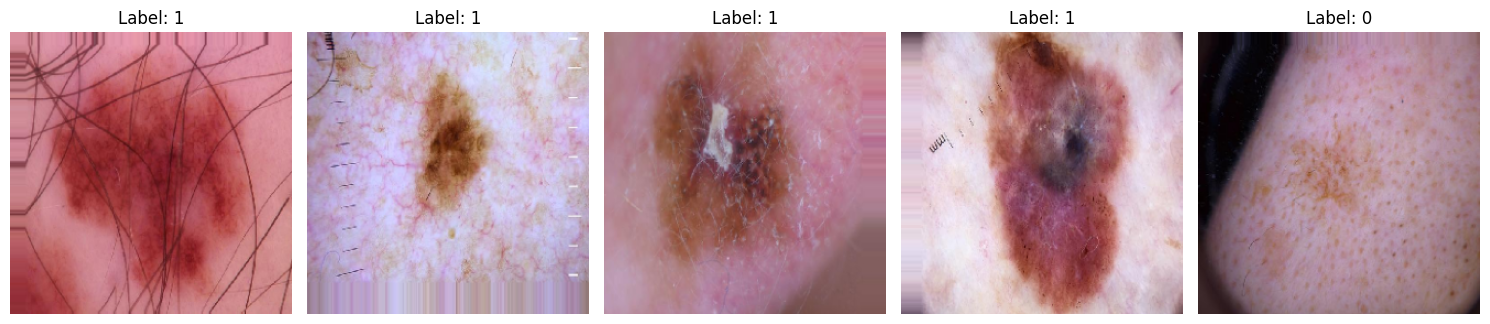

In [56]:
# Visualize examples
images, labels = next(train_generator)
plt.figure(figsize=(15, 5))  

for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(images[i])
    plt.title(f"Label: {int(labels[i])}")
    plt.axis('off')
      
plt.tight_layout()
plt.show()

# Parte 2.  Experimentación con libertad de escogencia del tipo de capas

1. En esta segunda implementación puede incluir capas tipo CNN y cualquier otra que considere aporta a la solución.
1. Deben utilizar **una de estas herramientas** para dar seguimiento a los resultados en el caso de la red neuronal artificial -En caso de desear utilizar otra herramienta muy similar, solo solicite de previo autorización al profesor-:
    1. https://www.wandb.com/
    1. https://www.comet.ml/site/

##Criterios de evaluación:
1. Deben presentar una implementación completa para la Parte 1 y para la Parte 2, en una de estas opciones: pytorch, tensorflow o keras (Claro que pueden usar numpy, pandas y otras bibliotecas más, para todo el tema de carga del dataset, analizarlo y pre-procesarlo). (**30 puntos cada una (total 60 ))**
1. Uso de herramienta de seguimiento de resultados. (**10 puntos**)
1. Uso de herramienta de selección de hiperparámetros. (**10 puntos**)
1. Documentación de decisiones en celdas de texto y comentarios al código. (**10 puntos**)
1. Conclusiones finales: En una celda de texto al final del cuaderno, incluya sus conclusiones más importantes de los experimentos y algunos de los gráficos que genera la herramienta seleccionada, junto con su interpretación de los mismos. (**10 puntos**)